In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("./California_wildfire_data_cleaned.csv")
df.head()

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,476.0,0.0,0.0,0.0,25.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb
3,3,Silverado Fire,Napa,CAL FIRE Sonoma-Lake-Napa Unit,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30T23:44:00Z,2013-05-01T17:15:00Z,-122.350844,38.441792,d8d1c943-7b5d-4885-9043-f41075d6eded
4,4,Yellow Fire,Sonoma,CAL FIRE Sonoma-Lake-Napa Unit,125.0,9.0,5.0,17.0,0.0,5.0,...,249.0,0.0,0.0,0.0,5.0,2013-05-01T02:01:00Z,2013-05-03T06:15:00Z,-122.655616,38.638828,64e4f81e-d872-44c4-ba8d-111fa77124ba


In [3]:
print (df.columns)

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID'],
      dtype='object')


In [4]:
df_value_counts= df["County"].value_counts()

In [5]:
print(df_value_counts.head(10))

County
Riverside          288
San Diego          155
Kern               145
Fresno             120
Los Angeles        110
San Luis Obispo    104
San Bernardino     103
Butte               94
Shasta              91
Siskiyou            87
Name: count, dtype: int64


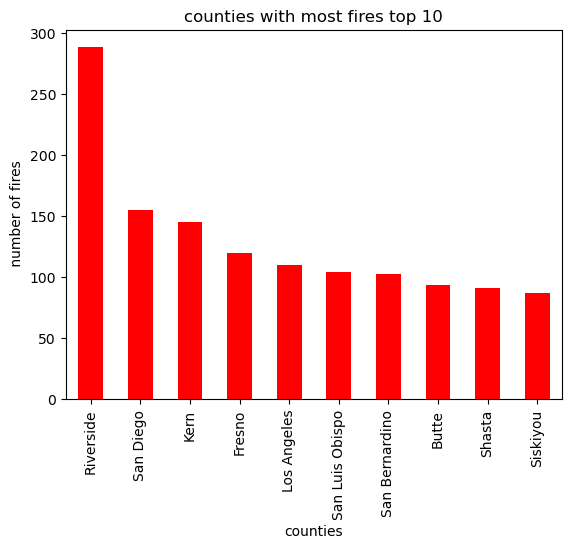

In [6]:
df_value_counts.head(10).plot(kind="bar",color = "red")
plt.title("counties with most fires top 10")
plt.xlabel("counties")
plt.ylabel(" number of fires")
plt.show()

In [7]:
county_acres_burned = df.groupby("County")["Acres Burned"].sum()

In [8]:
print(county_acres_burned.head(10)) # not sorted

County
Alameda                                    8252.0
Alameda, San Joaquin                         16.0
Alpine                                    71439.0
Amador                                     2073.0
Amador, Calaveras                          4470.0
Amador, El Dorado                          4240.0
Butte                                    268023.0
Butte, Plumas, Shasta, Lassen, Tehama    963309.0
Butte, Tehama                            429603.0
Calaveras                                 12881.0
Name: Acres Burned, dtype: float64


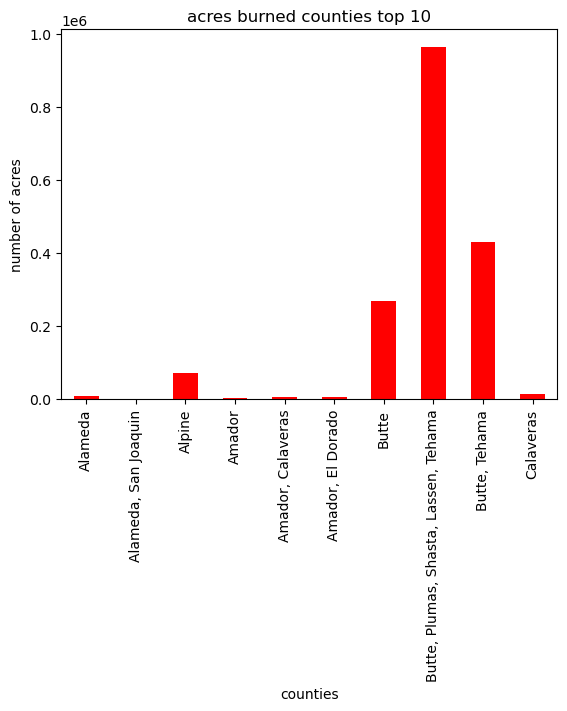

In [9]:
county_acres_burned.head(10).plot(kind="bar",color = "red")
plt.title("acres burned counties top 10")
plt.xlabel("counties")
plt.ylabel("number of acres")
plt.show()

In [10]:
df.dtypes

Unnamed: 0                 int64
Incident Name             object
County                    object
Administrative Unit       object
Acres Burned             float64
Crews Involved           float64
Dozers                   float64
Engines                  float64
Fatalities               float64
Helicopters              float64
Injuries                 float64
Personnel Involved       float64
Structures Damaged       float64
Structures Destroyed     float64
Structures Threatened    float64
Water Tenders            float64
Fire Started              object
Fire Extinguished         object
Longitude                float64
Latitude                 float64
Incident ID               object
dtype: object

In [11]:
df["Fire Started"] = pd.to_datetime(df["Fire Started"], errors='coerce')
df["Fire Extinguished"] = pd.to_datetime(df["Fire Extinguished"], errors='coerce')

df = df.dropna(subset=["Fire Started", "Fire Extinguished"])

df["fire duration"] =df["Fire Extinguished"] - df["Fire Started"]

max_duration = df["fire duration"].max()
longest_fires = df[df["fire duration"] == max_duration]

print(longest_fires)

      Unnamed: 0  Incident Name    County     Administrative Unit  \
1953        1953  Washburn Fire  Mariposa  Yosemite National Park   

      Acres Burned  Crews Involved  Dozers  Engines  Fatalities  Helicopters  \
1953        4886.0             0.0     0.0      0.0         0.0          0.0   

      ...  Structures Damaged  Structures Destroyed  Structures Threatened  \
1953  ...                 0.0                   0.0                    0.0   

      Water Tenders              Fire Started         Fire Extinguished  \
1953            0.0 2022-07-07 14:13:08+00:00 2023-08-03 09:29:42+00:00   

     Longitude Latitude                           Incident ID  \
1953  -119.614   37.499  776de6ba-3e3c-4388-b257-44e8c9231a95   

         fire duration  
1953 391 days 19:16:34  

[1 rows x 22 columns]


In [12]:
fire_format=longest_fires[["County","Fire Started", "Fire Extinguished", "fire duration"]]
print(fire_format)

        County              Fire Started         Fire Extinguished  \
1953  Mariposa 2022-07-07 14:13:08+00:00 2023-08-03 09:29:42+00:00   

         fire duration  
1953 391 days 19:16:34  


In [13]:
airquality_es = pd.read_csv("./California_airquality.csv")
airquality_es.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [14]:
airquality_es.dtypes

Date                               object
Source                             object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
UNITS                              object
DAILY_AQI_VALUE                     int64
Site Name                          object
DAILY_OBS_COUNT                     int64
PERCENT_COMPLETE                    int64
AQS_PARAMETER_CODE                  int64
AQS_PARAMETER_DESC                 object
CBSA_CODE                         float64
CBSA_NAME                          object
STATE_CODE                          int64
STATE                              object
COUNTY_CODE                         int64
COUNTY                             object
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
dtype: object

In [15]:
airquality_es["Date"] = pd.to_datetime(airquality_es["Date"])

C:\Users\shche\AppData\Local\Temp\ipykernel_2304\2771608916.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airquality_es["Date"] = pd.to_datetime(airquality_es["Date"])


In [16]:
airquality_es.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [17]:
airquality_es[airquality_es["Daily Mean PM2.5 Concentration"] > 50].columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [18]:

# airquality_es.columns = airquality_es.columns.str.strip()

high_pm25 = airquality_es[airquality_es["Daily Mean PM2.5 Concentration"] > 50]

if "COUNTY" in high_pm25.columns:
    counties = high_pm25["COUNTY"].unique()
    print("Counties with Daily Mean PM2.5 Concentration over 50:", counties)


Counties with Daily Mean PM2.5 Concentration over 50: ['Alameda' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa' 'Fresno' 'Glenn'
 'Inyo' 'Kern' 'Kings' 'Los Angeles' 'Madera' 'Marin' 'Mariposa' 'Merced'
 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer' 'Plumas' 'Sacramento'
 'San Benito' 'San Bernardino' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tulare' 'Yolo']


In [19]:

airquality_es.groupby("Date")[["COUNTY","Daily Mean PM2.5 Concentration"]].max()

,COUNTY,Daily Mean PM2.5 Concentration
Date,,
2020-01-01,Yolo,47.3
2020-01-02,Yolo,35.9
2020-01-03,Yolo,33.8
2020-01-04,Yolo,36.8
2020-01-05,Yolo,45.9
...,...,...
2020-09-06,Yolo,173.2
2020-09-07,Yolo,95.2
2020-09-08,Yolo,120.3


In [20]:
df.columns

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID', 'fire duration'],
      dtype='object')

In [21]:
airquality_es.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [22]:
df["Fire Started"]

0      2013-02-24 08:16:00+00:00
1      2013-04-20 17:30:00+00:00
2      2013-04-30 12:59:00+00:00
3      2013-04-30 23:44:00+00:00
4      2013-05-01 02:01:00+00:00
                  ...           
2773   2025-01-23 00:36:20+00:00
2774   2025-01-23 09:41:57+00:00
2776   2025-01-23 14:42:58+00:00
2777   2025-01-23 16:40:30+00:00
2778   2025-01-29 12:53:53+00:00
Name: Fire Started, Length: 2183, dtype: datetime64[ns, UTC]

In [23]:
df["Fire Started 2"] = df["Fire Started"].dt.date

In [24]:

merged_df = pd.merge(df.set_index("Fire Started 2"), airquality_es.set_index("Date"), left_on = "County", right_on = "COUNTY", how = "left")
merged_df



,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,88502.0,Acceptable PM2.5 AQI & Speciation Mass,13860.0,"Bishop, CA",6.0,California,27.0,Inyo,37.360684,-118.330783
1,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,13860.0,"Bishop, CA",6.0,California,27.0,Inyo,37.360684,-118.330783
2,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,13860.0,"Bishop, CA",6.0,California,27.0,Inyo,37.360684,-118.330783
3,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,88502.0,Acceptable PM2.5 AQI & Speciation Mass,13860.0,"Bishop, CA",6.0,California,27.0,Inyo,37.360684,-118.330783
4,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,13860.0,"Bishop, CA",6.0,California,27.0,Inyo,37.360684,-118.330783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845837,2778,Rosa Fire,San Luis Obispo,CAL FIRE San Luis Obispo Unit,105.0,0.0,0.0,0.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",6.0,California,79.0,San Luis Obispo,35.494530,-120.666170
1845838,2778,Rosa Fire,San Luis Obispo,CAL FIRE San Luis Obispo Unit,105.0,0.0,0.0,0.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",6.0,California,79.0,San Luis Obispo,35.494530,-120.666170
1845839,2778,Rosa Fire,San Luis Obispo,CAL FIRE San Luis Obispo Unit,105.0,0.0,0.0,0.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",6.0,California,79.0,San Luis Obispo,35.494530,-120.666170
1845840,2778,Rosa Fire,San Luis Obispo,CAL FIRE San Luis Obispo Unit,105.0,0.0,0.0,0.0,0.0,0.0,...,88101.0,PM2.5 - Local Conditions,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",6.0,California,79.0,San Luis Obispo,35.494530,-120.666170


In [25]:
merged_df.columns

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID', 'fire duration', 'Source', 'Site ID', 'POC',
       'Daily Mean PM2.5 Concentration', 'UNITS', 'DAILY_AQI_VALUE',
       'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

In [26]:
merged_df[["Longitude","SITE_LONGITUDE", "Latitude","SITE_LATITUDE"]]

,Longitude,SITE_LONGITUDE,Latitude,SITE_LATITUDE
0,-118.016510,-118.330783,36.602575,37.360684
1,-118.016510,-118.330783,36.602575,37.360684
2,-118.016510,-118.330783,36.602575,37.360684
3,-118.016510,-118.330783,36.602575,37.360684
4,-118.016510,-118.330783,36.602575,37.360684
...,...,...,...,...
1845837,-119.982524,-120.666170,35.303682,35.494530
1845838,-119.982524,-120.666170,35.303682,35.494530
1845839,-119.982524,-120.666170,35.303682,35.494530
1845840,-119.982524,-120.666170,35.303682,35.494530


In [27]:
bins = [0, 50, 100, 150, 200, 300, 1000]
labels= ["Green", "Yellow", "Orange", "Red", "Purple", "Maroon"]
airquality_es["AQI_Color"]= pd.cut(airquality_es["DAILY_AQI_VALUE"], bins= bins, labels= labels)

In [28]:
airquality_es.head(3)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,AQI_Color
0,2020-01-01,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,...,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Green
1,2020-01-02,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,...,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Green
2,2020-01-03,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,...,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Yellow


In [29]:
bins = [0, 50, 100, 150, 200, 300, 1000]
labels= ["Good", "Moderate", "Unheathy For Sensitive Groups", "Unhelthy For All", "Vert Unhealthy", "Hazardous"]
airquality_es["AQI_Category"]= pd.cut(airquality_es["DAILY_AQI_VALUE"], bins= bins, labels= labels)

In [30]:
airquality_es.head(3)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,AQI_Color,AQI_Category
0,2020-01-01,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Green,Good
1,2020-01-02,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Green,Good
2,2020-01-03,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,Yellow,Moderate


In [31]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv  


In [32]:
load_dotenv()

map_box_api = os.getenv("MAPBOX_API_KEY")  
px.set_mapbox_access_token(map_box_api)

In [33]:
type(map_box_api)

str

In [34]:
df.columns

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID', 'fire duration', 'Fire Started 2'],
      dtype='object')

In [36]:
airquality_es.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'AQI_Color',
       'AQI_Category'],
      dtype='object')

In [37]:
import plotly.express as px

map_1 = px.scatter_mapbox(airquality_es,
    lat="SITE_LATITUDE",
    lon="SITE_LONGITUDE"	,
    color="AQI_Color"
)
map_1.show()

In [38]:
import plotly.express as px

map_1 = px.scatter_mapbox(airquality_es,
    lat="SITE_LATITUDE",
    lon="SITE_LONGITUDE"	,
    color="AQI_Category"
)
map_1.show()